In [1]:
import pandas as pd
import numpy as np 

In [8]:
df = pd.read_csv("anime.csv")
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11114 entries, 0 to 11113
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  11114 non-null  int64  
 1   name      11114 non-null  object 
 2   genre     11052 non-null  object 
 3   type      11091 non-null  object 
 4   episodes  11114 non-null  object 
 5   rating    10894 non-null  float64
 6   members   11114 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 607.9+ KB
None


In [10]:
print(df.describe())

           anime_id        rating       members
count  11114.000000  10894.000000  1.111400e+04
mean   14494.764081      6.504418  1.967915e+04
std    11551.556969      1.050491  5.740776e+04
min        1.000000      1.670000  5.000000e+00
25%     3516.250000      5.900000  1.880000e+02
50%    10800.500000      6.620000  1.430000e+03
75%    25608.500000      7.240000  1.161500e+04
max    34527.000000     10.000000  1.013917e+06


### Handling Missing Value

In [11]:
print(df.isnull().sum())

anime_id      0
name          0
genre        62
type         23
episodes      0
rating      220
members       0
dtype: int64


In [25]:
df.duplicated().sum()

np.int64(0)

### Handling Categorical Value

In [ ]:
updated_rows = df_copy[df_copy[['type', 'genre']].isna().any(axis=1)]

# Fill missing values with mode for 'type' and 'genre'
df[['type', 'genre']] = df[['type', 'genre']].apply(lambda x: x.fillna(x.mode()[0]))

# Display the updated rows with their new values
print("\nRows where missing values were imputed:")
print(df.loc[updated_rows.index, ['anime_id', 'name', 'type', 'genre']].head())me_id', 'name', 'type', 'genre']].head())


Rows where missing values were imputed:
      anime_id                                       name     type   genre
2844     33242  IS: Infinite Stratos 2 - Infinite Wedding  Special  Comedy
3541     33589                              ViVid Strike!       TV  Comedy
6040     29765                          Metropolis (2009)    Movie  Comedy
6646     32695                               Match Shoujo      ONA  Comedy
7018     33187                           Katsudou Shashin    Movie  Comedy


In [15]:
df.isnull().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

### Visualization

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

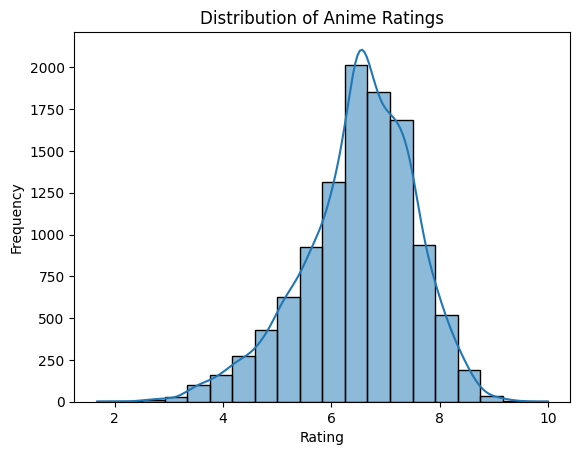

In [17]:
sns.histplot(df['rating'], kde=True, bins=20)
plt.title('Distribution of Anime Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

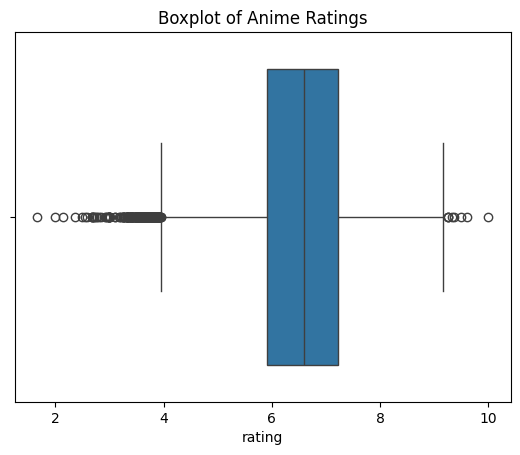

In [19]:
sns.boxplot(x=df['rating'])
plt.title('Boxplot of Anime Ratings')
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1844\2815078219.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='type', y='rating', data=df, estimator=lambda x: x.mean(), palette='viridis')


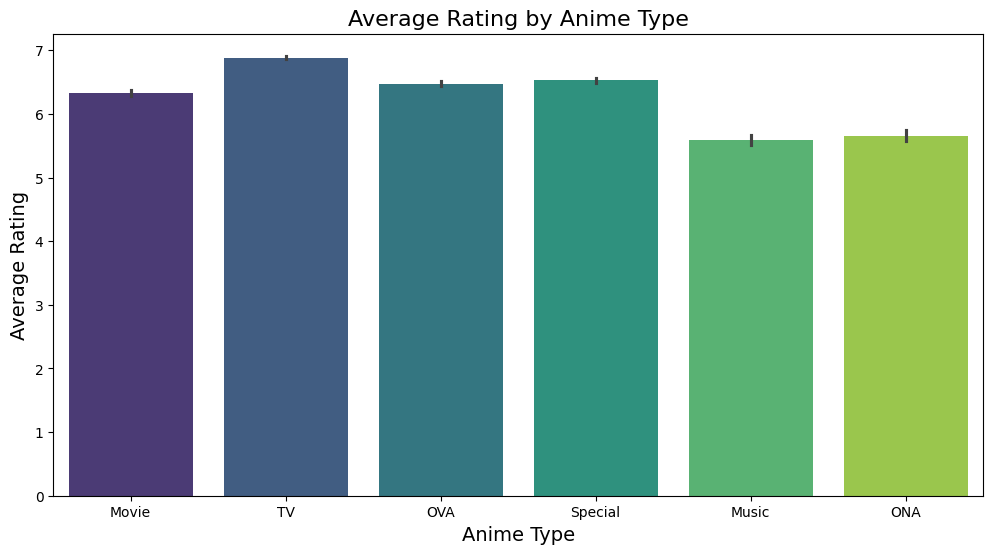

In [20]:
sample_data = df.sample(frac=0.5, random_state=42)
plt.figure(figsize=(12, 6))
sns.barplot(x='type', y='rating', data=df, estimator=lambda x: x.mean(), palette='viridis')

plt.title("Average Rating by Anime Type", fontsize=16)
plt.xlabel("Anime Type", fontsize=14)
plt.ylabel("Average Rating", fontsize=14)
plt.show()

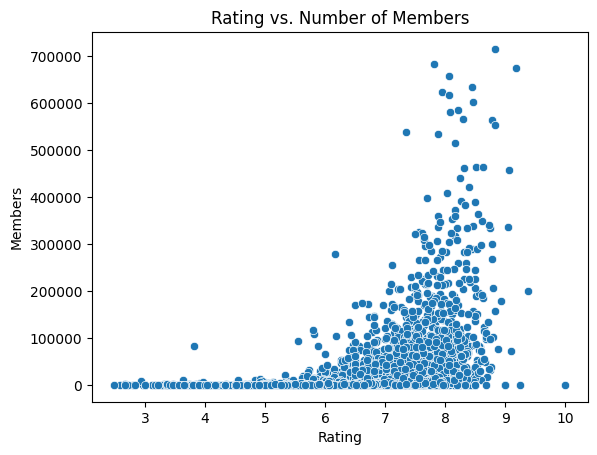

In [21]:
sns.scatterplot(x=sample_data['rating'], y=sample_data['members'])
plt.title('Rating vs. Number of Members')
plt.xlabel('Rating')
plt.ylabel('Members')
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1844\2934852638.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['type'], palette='gist_rainbow')


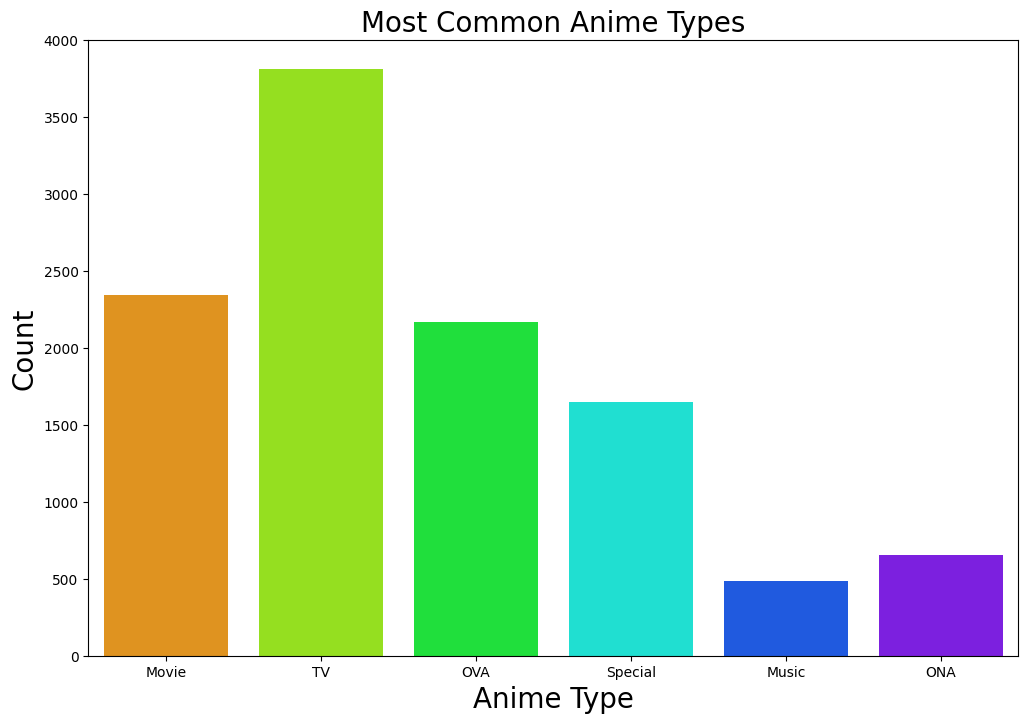

In [22]:
fig = plt.figure(figsize=(12, 8))
sns.countplot(x=df['type'], palette='gist_rainbow')
plt.title("Most Common Anime Types", fontsize=20)
plt.xlabel("Anime Type", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.show()